In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import modules
from src.features import stat_tests as st
from src.features import calculate_chart_params as cp
from src.features import functions as fn
from src.features import plot_functions as pf

In [3]:
import pandas as pd
import numpy as np

In [4]:
from scipy.stats import norm

#### Simulate drastic change

In [5]:
norm_drastic = fn.gen_rv_seq(norm, args_list = [[10, 2], [20, 2]], size_list = [30, 30])

In [6]:
in_control_mean = norm_drastic['rv'][norm_drastic['seq'] == 0].mean()
MR = cp.calculate_MR(norm_drastic['rv'][norm_drastic['seq'] == 0])
in_control_sigma = cp.estimate_sigma_from_MR(MR)

print(in_control_mean, in_control_sigma)

10.089427941923741 2.5299771879217547


In [7]:
x_ind_params2 = cp.x_ind_params(x = norm_drastic.rv, sigma = in_control_sigma, center = in_control_mean)

In [8]:
x_ind_params2 = x_ind_params2.reset_index()

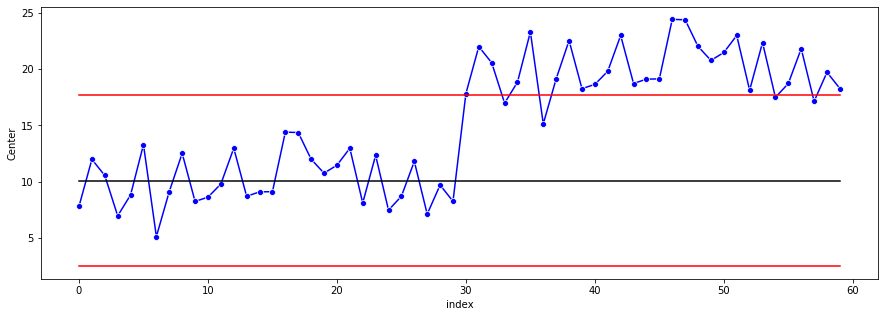

In [9]:
pf.plot_control_chart(
    data=x_ind_params2,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)

In [10]:
x_ind_params2['index'][x_ind_params2['obs'] > x_ind_params2['UCL']][0:5]

30    30
31    31
32    32
34    34
35    35
Name: index, dtype: int64

#### Use EWMA

In [11]:
x_ewma_params = cp.ewma_params(x = norm_drastic.rv, sigma = in_control_sigma, alpha=0.1, center = in_control_mean)

In [12]:
x_ewma_params = x_ewma_params.reset_index()

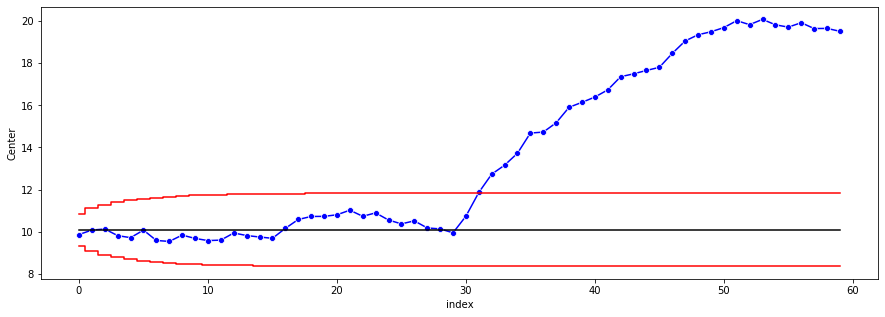

In [13]:
pf.plot_control_chart(
    data=x_ewma_params,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title=None,
    ylab=None,
    xlab=None,
    all_dates=False,
    rot=0)

In [14]:
x_ewma_params['index'][x_ewma_params['obs'] > x_ewma_params['UCL']][0:5]

31    31
32    32
33    33
34    34
35    35
Name: index, dtype: int64

#### Simulate gradual change

In [15]:
norm_gradual = fn.gen_rv_seq(norm, args_list = [[10, 2], [14, 2]], size_list = [30, 30])

In [16]:
in_control_mean = norm_gradual['rv'][norm_gradual['seq'] == 0].mean()
MR = cp.calculate_MR(norm_gradual['rv'][norm_gradual['seq'] == 0])
in_control_sigma = cp.estimate_sigma_from_MR(MR)

print(in_control_mean, in_control_sigma)

10.089427941923741 2.5299771879217547


In [17]:
x_ind_params2 = cp.x_ind_params(x = norm_gradual.rv, sigma = in_control_sigma, center = in_control_mean)

In [18]:
x_ind_params2 = x_ind_params2.reset_index()

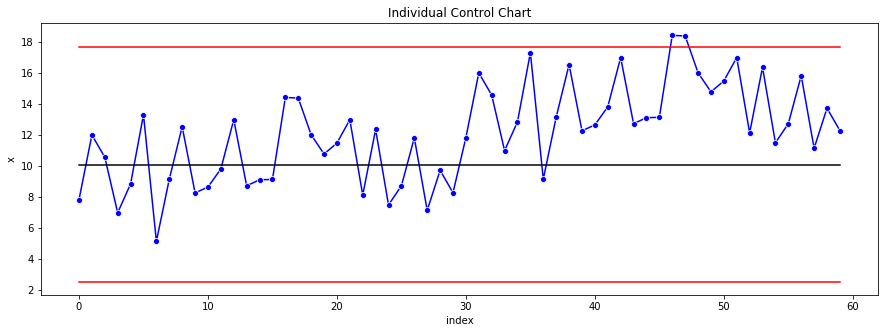

In [19]:
pf.plot_control_chart(
    data=x_ind_params2,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title='Individual Control Chart',
    ylab='x',
    xlab=None,
    all_dates=False,
    rot=0)

In [20]:
x_ind_params2['index'][x_ind_params2['obs'] > x_ind_params2['UCL']][0:5]

46    46
47    47
Name: index, dtype: int64

#### Use EWMA

In [21]:
x_ewma_params = cp.ewma_params(x = norm_gradual.rv, sigma = in_control_sigma, alpha=0.1, center = in_control_mean)

In [22]:
x_ewma_params = x_ewma_params.reset_index()

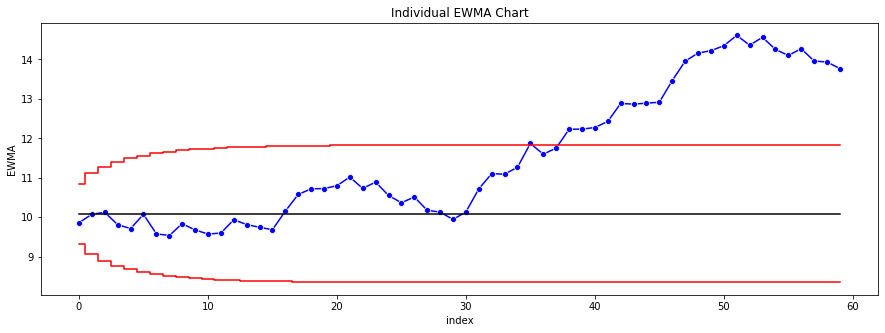

In [23]:
pf.plot_control_chart(
    data=x_ewma_params,
    index='index',
    obs='obs',
    UCL='UCL',
    center='Center',
    LCL='LCL',
    drawstyle='steps-mid',
    title='Individual EWMA Chart',
    ylab='EWMA',
    xlab=None,
    all_dates=False,
    rot=0)

In [24]:
x_ewma_params['index'][x_ewma_params['obs'] > x_ewma_params['UCL']][0:5]

35    35
38    38
39    39
40    40
41    41
Name: index, dtype: int64